## Bitcoin Price Prediction

This notebook focuses on predicting the price of Bitcoin using the Autoregressive Integrated Moving Average (ARIMA) model. The goal is to leverage historical Bitcoin price data to develop a forecasting model that can provide insights into future price movements.

The dataset used in this analysis is the "Bitcoin Historical Data" from Kaggle, which contains daily Bitcoin price information including open, high, low, close prices, as well as volume and weighted price. The dataset spans a specific time range and provides a valuable resource for training and evaluating the predictive model.

The notebook is structured as follows:

1. Data Preparation

2. Exploratory Data Analysis (EDA)

3. Feature Engineering

4. Model Training and Evaluation

5. Conclusion and Future Work

By the end of this notebook, we aim to have a well-performing ARIMA model that can make reliable predictions of Bitcoin prices. This information can be valuable for traders, investors, and anyone interested in understanding and forecasting cryptocurrency market trends.

Let's get started with the data preparation and exploration!


In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
# Load the dataset
data = pd.read_csv('btcusd_1-min_data.csv')

## Understand Data

In [7]:
# Display the first few rows of the dataset
print(data.head())

      Timestamp  Open  High   Low  Close  Volume
0  1.325412e+09  4.58  4.58  4.58   4.58     0.0
1  1.325412e+09  4.58  4.58  4.58   4.58     0.0
2  1.325412e+09  4.58  4.58  4.58   4.58     0.0
3  1.325412e+09  4.58  4.58  4.58   4.58     0.0
4  1.325412e+09  4.58  4.58  4.58   4.58     0.0


In [8]:
# Check the dimensions of the dataset
print('Dataset Shape:', data.shape)

Dataset Shape: (6772281, 6)


In [9]:
# Check the data types of each column
print('Data Types:', data.dtypes)

Data Types: Timestamp    float64
Open         float64
High         float64
Low          float64
Close        float64
Volume       float64
dtype: object


In [10]:
# Summary statistics
print('Summary Statistics:')
print(data.describe())

Summary Statistics:
          Timestamp          Open          High           Low         Close  \
count  6.772280e+06  6.772281e+06  6.772281e+06  6.772281e+06  6.772281e+06   
mean   1.528666e+09  1.499611e+04  1.500249e+04  1.498952e+04  1.499612e+04   
std    1.174228e+08  2.056363e+04  2.057129e+04  2.055576e+04  2.056365e+04   
min    1.325412e+09  3.800000e+00  3.800000e+00  3.800000e+00  3.800000e+00   
25%    1.427007e+09  4.148600e+02  4.149700e+02  4.147000e+02  4.148500e+02   
50%    1.528602e+09  6.314280e+03  6.316920e+03  6.311310e+03  6.314300e+03   
75%    1.630197e+09  2.354000e+04  2.354900e+04  2.353100e+04  2.354000e+04   
max    1.740269e+09  1.089460e+05  1.090300e+05  1.087760e+05  1.089600e+05   

             Volume  
count  6.772281e+06  
mean   5.442645e+00  
std    2.288500e+01  
min    0.000000e+00  
25%    1.841000e-02  
50%    4.977057e-01  
75%    3.160058e+00  
max    5.853852e+03  


## Data Preprocessing

In [11]:
# Check for missing values
missing_values = data.isnull().sum()
print('Missing Values:')
print(missing_values)

Missing Values:
Timestamp    1
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64


In [12]:
df=data

In [13]:
# Convert Unix time to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

# Resample to daily frequency
df_daily = df.resample('D', on='Timestamp').mean()

# Resample to monthly frequency
df_monthly = df.resample('M', on='Timestamp').mean()

# Resample to annual frequency
df_annual = df.resample('A-DEC', on='Timestamp').mean()

# Resample to quarterly frequency
df_quarterly = df.resample('Q-DEC', on='Timestamp').mean()

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\tools\datetimes.py:557: RuntimeWarning: invalid value encountered in cast
  arr, tz_parsed = tslib.array_with_unit_to_datetime(arg, unit, errors=errors)


## Handling Missing Values

In [14]:
# Handling missing values in df_daily
df_daily = df_daily.fillna(df_daily.mean())

# Handling missing values in df_monthly
df_monthly = df_monthly.fillna(df_monthly.mean())

# Handling missing values in df_annual
df_annual = df_annual.fillna(df_annual.mean())

# Handling missing values in df_quarterly
df_quarterly = df_quarterly.fillna(df_quarterly.mean())


## Feature Engineering

In [15]:
# Calculate the daily percentage change in Bitcoin price
df_daily['Price_Pct_Change'] = df_daily['Close'].pct_change()

# Calculate 3-month moving average for df_monthly
df_monthly['Moving_Average_3M'] = df_monthly['Close'].rolling(window=3).mean()

# Calculate 6-month moving average for df_monthly
df_monthly['Moving_Average_6M'] = df_monthly['Close'].rolling(window=6).mean()

# Calculate 12-month moving average for df_annual
df_annual['Moving_Average_12M'] = df_annual['Close'].rolling(window=12).mean()

# Calculate 3-month rolling standard deviation for df_quarterly
df_quarterly['Rolling_Std_3M'] = df_quarterly['Close'].rolling(window=3).std()

# Calculate 6-month rolling standard deviation for df_quarterly
df_quarterly['Rolling_Std_6M'] = df_quarterly['Close'].rolling(window=6).std()


In [16]:
df.head()

,Timestamp,Open,High,Low,Close,Volume
0,2012-01-01 10:01:00,4.58,4.58,4.58,4.58,0.0
1,2012-01-01 10:02:00,4.58,4.58,4.58,4.58,0.0
2,2012-01-01 10:03:00,4.58,4.58,4.58,4.58,0.0
3,2012-01-01 10:04:00,4.58,4.58,4.58,4.58,0.0
4,2012-01-01 10:05:00,4.58,4.58,4.58,4.58,0.0


## Exploratory Data Analysis

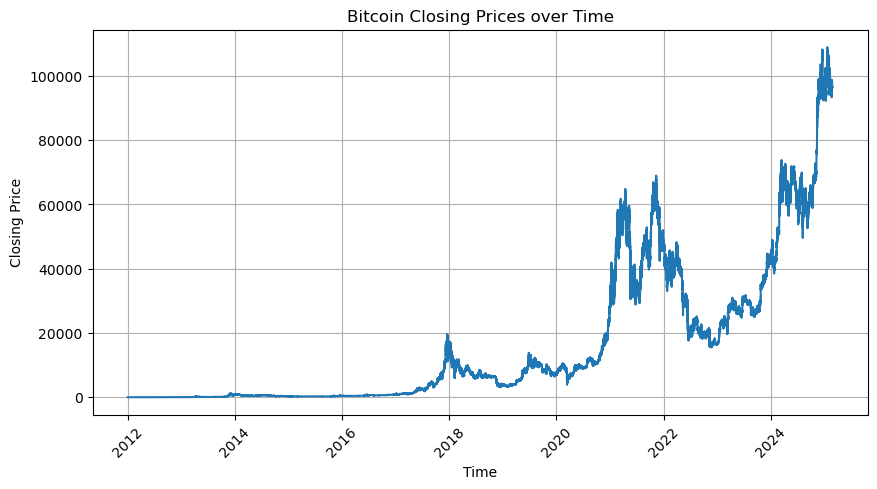

In [17]:
import matplotlib.pyplot as plt

# Convert Unix time to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

# Set the Timestamp column as the index
df.set_index('Timestamp', inplace=True)

# Plot 1: Line chart of Bitcoin closing prices over time
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'])
plt.title('Bitcoin Closing Prices over Time')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

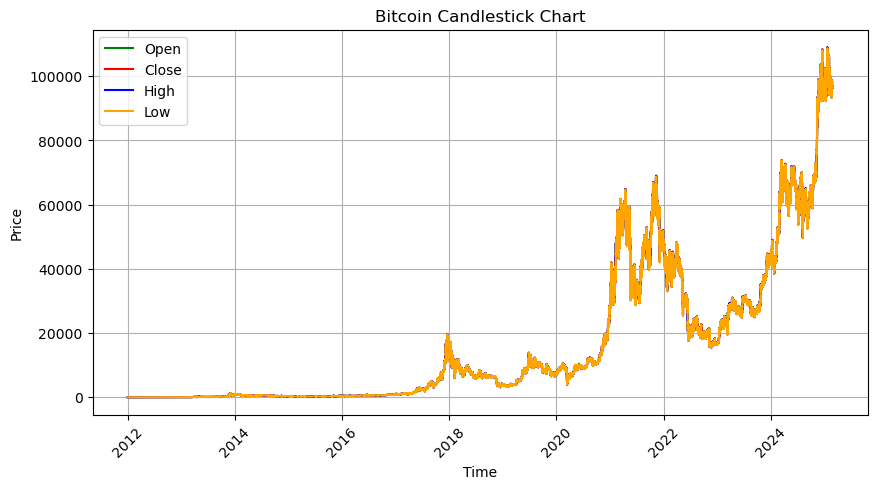

In [18]:
# Plot 2: Candlestick chart of Bitcoin prices
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Open'], color='green', label='Open')
plt.plot(df.index, df['Close'], color='red', label='Close')
plt.plot(df.index, df['High'], color='blue', label='High')
plt.plot(df.index, df['Low'], color='orange', label='Low')
plt.title('Bitcoin Candlestick Chart')
plt.xlabel('Time')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

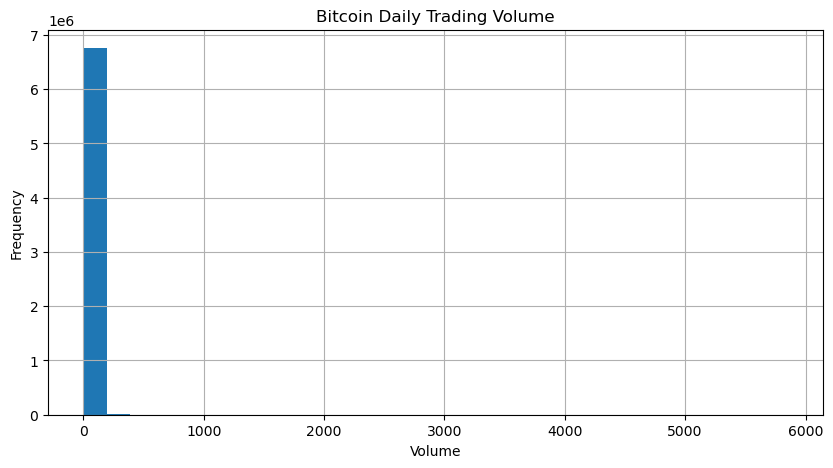

In [33]:
# Plot 3: Histogram of Bitcoin daily trading volume
plt.figure(figsize=(10, 5))
plt.hist(df['Volume'], bins=30)
plt.title('Bitcoin Daily Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

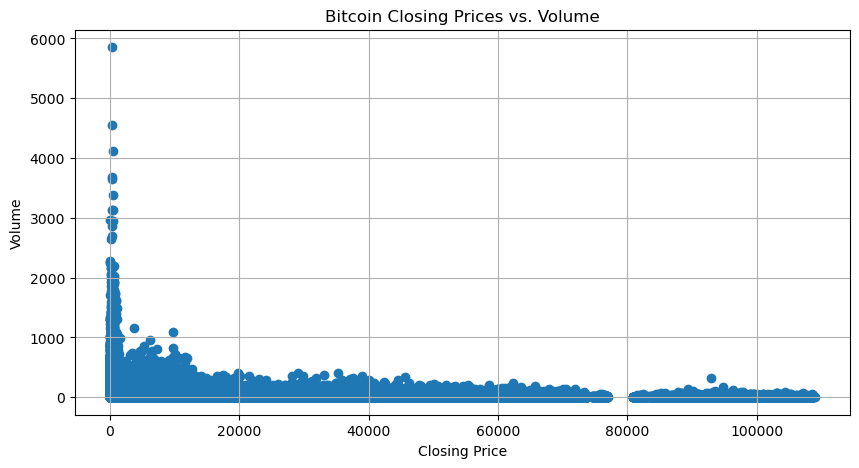

In [34]:
# Plot 4: Scatter plot of Bitcoin closing prices and volume
plt.figure(figsize=(10, 5))
plt.scatter(df['Close'], df['Volume'])
plt.title('Bitcoin Closing Prices vs. Volume')
plt.xlabel('Closing Price')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

<Figure size 1000x500 with 0 Axes>

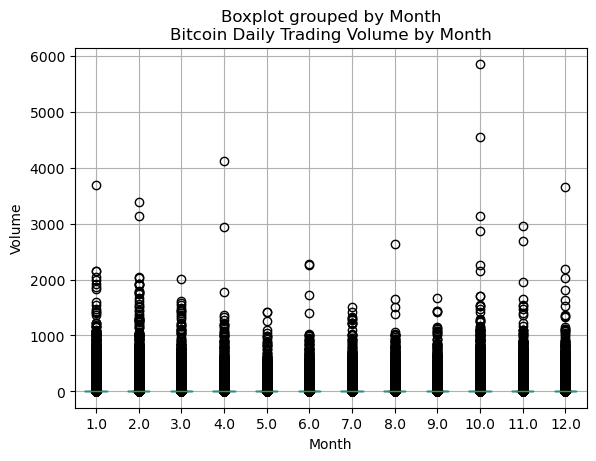

In [35]:
# Plot 5: Box plot of Bitcoin daily trading volume by month
df['Month'] = df.index.month
plt.figure(figsize=(10, 5))
df.boxplot(column='Volume', by='Month')
plt.title('Bitcoin Daily Trading Volume by Month')
plt.xlabel('Month')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

## Model Selection

In [36]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [37]:
# Split data into train and test sets
train_size = int(len(df_daily) * 0.8)
train_data, test_data = df_daily[:train_size], df_daily[train_size:]

In [38]:
# Scale the data
scaler = MinMaxScaler()
scaled_train_data = scaler.fit_transform(train_data[['Close']])
scaled_test_data = scaler.transform(test_data[['Close']])

In [39]:
# ARIMA model
arima_model = ARIMA(train_data['Close'], order=(1, 1, 1))
arima_model_fit = arima_model.fit()
arima_predictions = arima_model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [40]:
# SARIMA model
sarima_model = SARIMAX(train_data['Close'], order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
sarima_model_fit = sarima_model.fit()
sarima_predictions = sarima_model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [50]:
# LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(1, 1)))
    model.add(LSTM(64))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

lstm_model = create_lstm_model()
lstm_history = lstm_model.fit(np.expand_dims(scaled_train_data, axis=-1),
                              np.expand_dims(scaled_train_data, axis=-1),
                              epochs=10, batch_size=1, verbose=0)
lstm_predictions = lstm_model.predict(np.expand_dims(scaled_test_data, axis=-1))

31/31 [==============================] - 1s 2ms/step


In [51]:
# Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor()
gbr_model.fit(np.arange(len(train_data)).reshape(-1, 1), train_data['Close'])
gbr_predictions = gbr_model.predict(np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1))

In [52]:
# Calculate RMSE for each model
arima_rmse = np.sqrt(mean_squared_error(test_data['Close'], arima_predictions))
sarima_rmse = np.sqrt(mean_squared_error(test_data['Close'], sarima_predictions))
lstm_rmse = np.sqrt(mean_squared_error(test_data['Close'], lstm_predictions))
gbr_rmse = np.sqrt(mean_squared_error(test_data['Close'], gbr_predictions))

# Print the RMSE values
print(f"ARIMA RMSE: {arima_rmse}")
print(f"SARIMA RMSE: {sarima_rmse}")
print(f"LSTM RMSE: {lstm_rmse}")
print(f"Gradient Boosting Regressor RMSE: {gbr_rmse}")

ARIMA RMSE: 34406.33084155291
SARIMA RMSE: 31463.74939878466
LSTM RMSE: 51829.236136328225
Gradient Boosting Regressor RMSE: 34941.544539305345


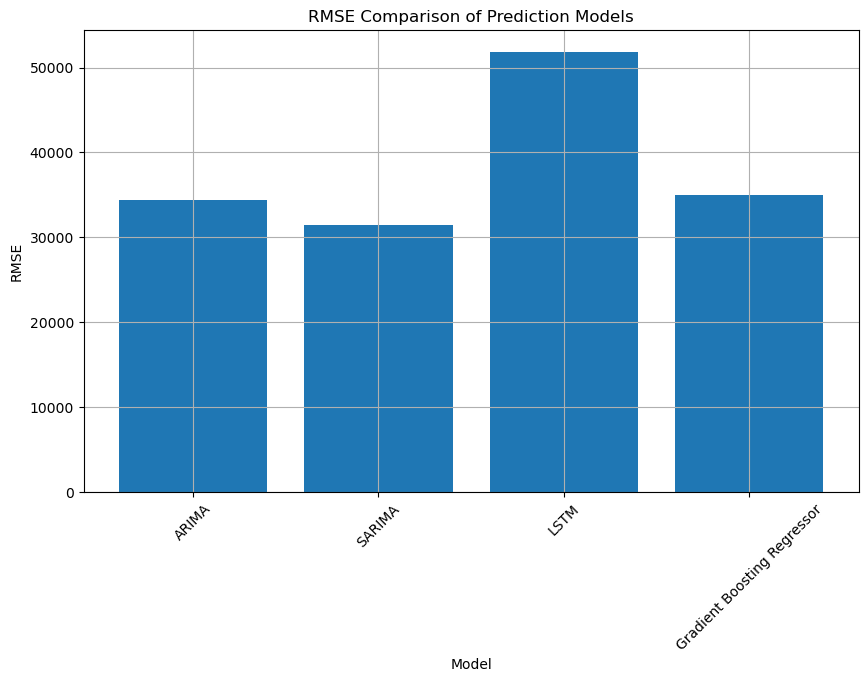

In [53]:
# Define the models and RMSE values
models = ['ARIMA', 'SARIMA', 'LSTM', 'Gradient Boosting Regressor']
rmse_values = [arima_rmse, sarima_rmse, lstm_rmse, gbr_rmse]

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values)
plt.title('RMSE Comparison of Prediction Models')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
